In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import sys
import os

# Add the src directory to the path to import our module
sys.path.append(os.path.abspath('../src'))
from data_ingestion import load_data

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Libraries imported successfully.")

✅ Libraries imported successfully.


In [6]:
# Load the raw data
df = load_data().copy()

# Quick check
df.head()

✅ Data loaded successfully!
📊 Dataset Shape: 1450 rows, 81 columns


,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# 1. Remove rows where 'name' is missing (we can't battle anonymous heroes)
df_clean = df.dropna(subset=['name']).reset_index(drop=True)

# 2. Convert 'overall_score' to numeric (it was detected as 'object')
# Coerce errors turns non-convertible values to NaN
df_clean['overall_score'] = pd.to_numeric(df_clean['overall_score'], errors='coerce')

# 3. Fill missing text fields with "Unknown" for NLP safety
text_cols = ['history_text', 'powers_text']
for col in text_cols:
    df_clean[col] = df_clean[col].fillna("Unknown")

print(f"✅ Cleaning complete. Rows retained: {len(df_clean)}")
print(f"📊 Data Types after conversion:")
print(df_clean[['name', 'overall_score', 'intelligence_score', 'history_text']].dtypes)

✅ Cleaning complete. Rows retained: 1448
📊 Data Types after conversion:
name                   object
overall_score         float64
intelligence_score      int64
history_text           object
dtype: object


/var/folders/lx/y473dmd16l3c0kkr0h14c2x40000gn/T/ipykernel_57752/953297595.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='alignment', order=df_clean['alignment'].value_counts().index, palette='viridis')


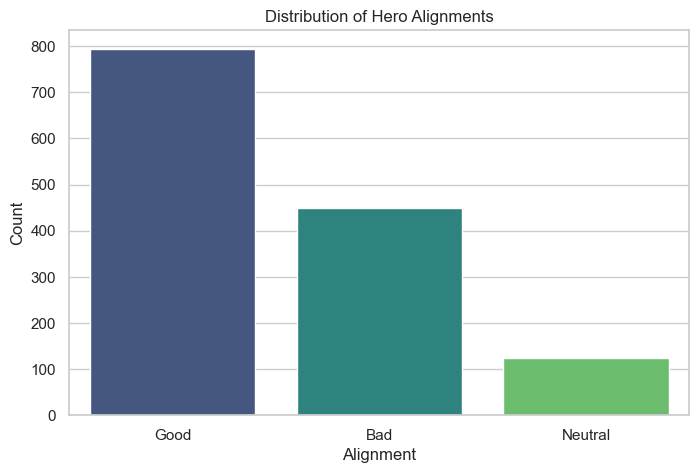

In [10]:
# Count plot for Superhero Alignment
if 'alignment' in df_clean.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_clean, x='alignment', order=df_clean['alignment'].value_counts().index, palette='viridis')
    plt.title('Distribution of Hero Alignments')
    plt.xlabel('Alignment')
    plt.ylabel('Count')
    plt.show()
else:
    print("⚠️ 'alignment' column not found.")

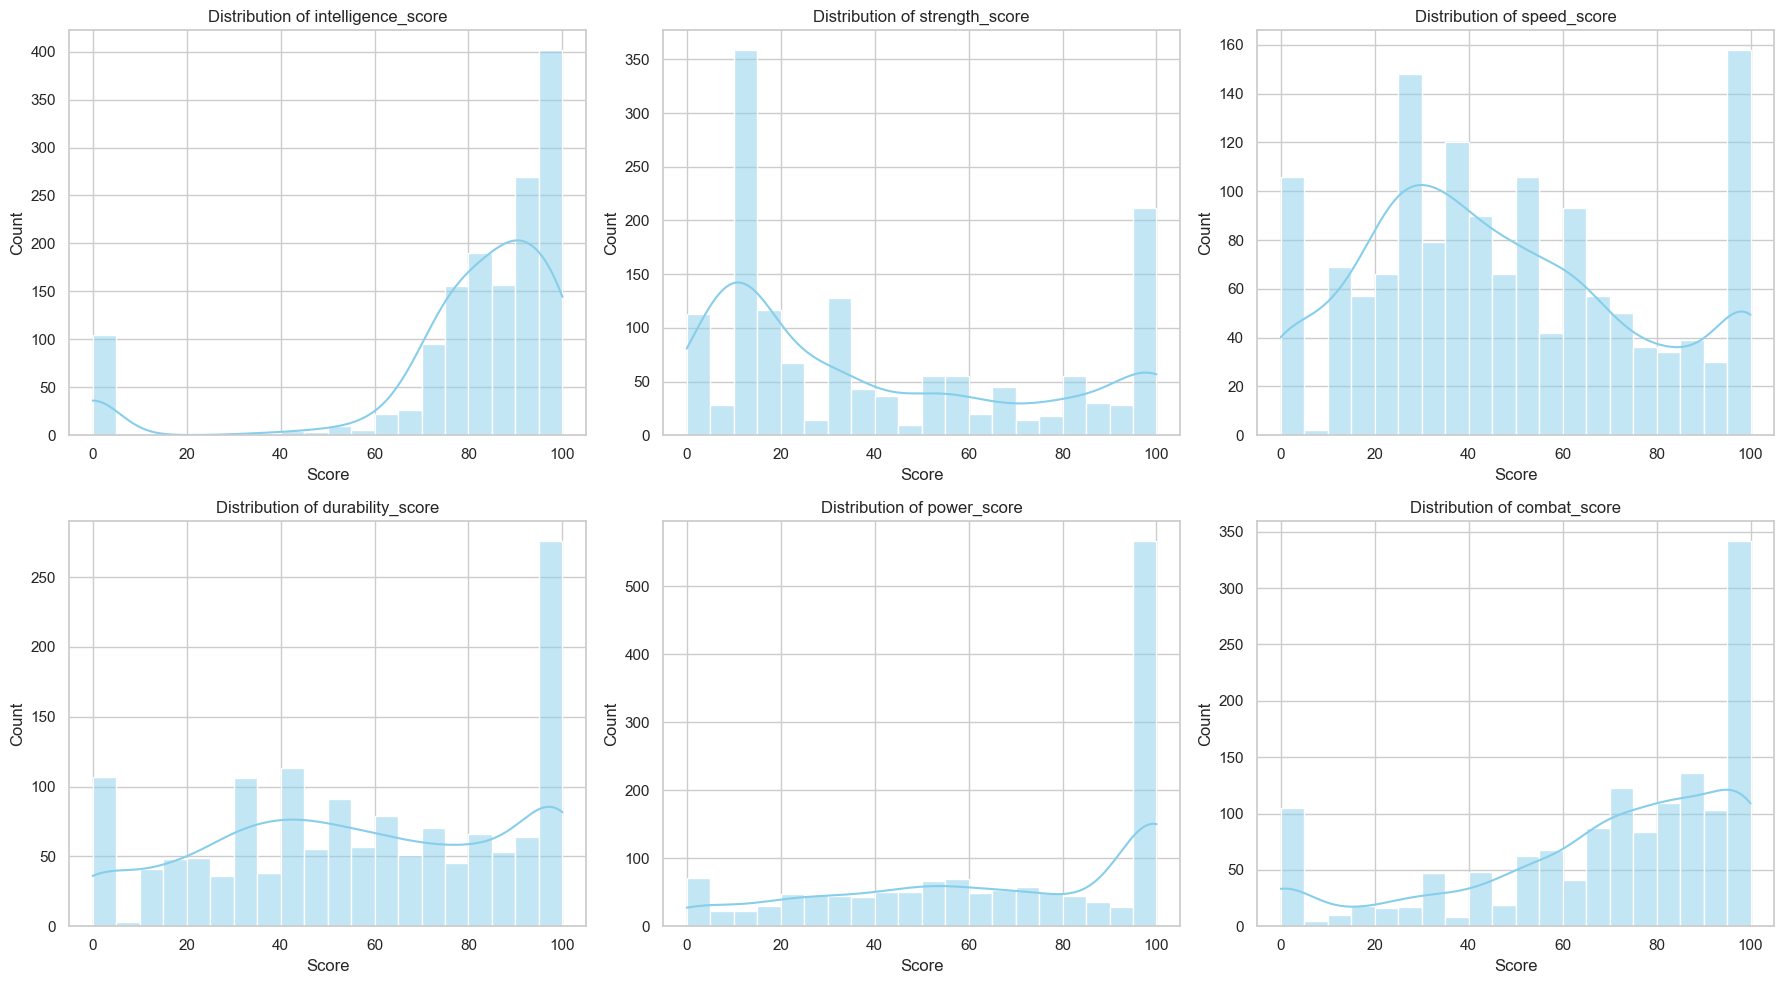

In [11]:
# List of core numerical stats to analyze
core_stats = ['intelligence_score', 'strength_score', 'speed_score', 'durability_score', 'power_score', 'combat_score']

# Plot histograms
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, stat in enumerate(core_stats):
    sns.histplot(df_clean[stat], bins=20, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {stat}')
    axes[i].set_xlabel('Score')

plt.tight_layout()
plt.show()

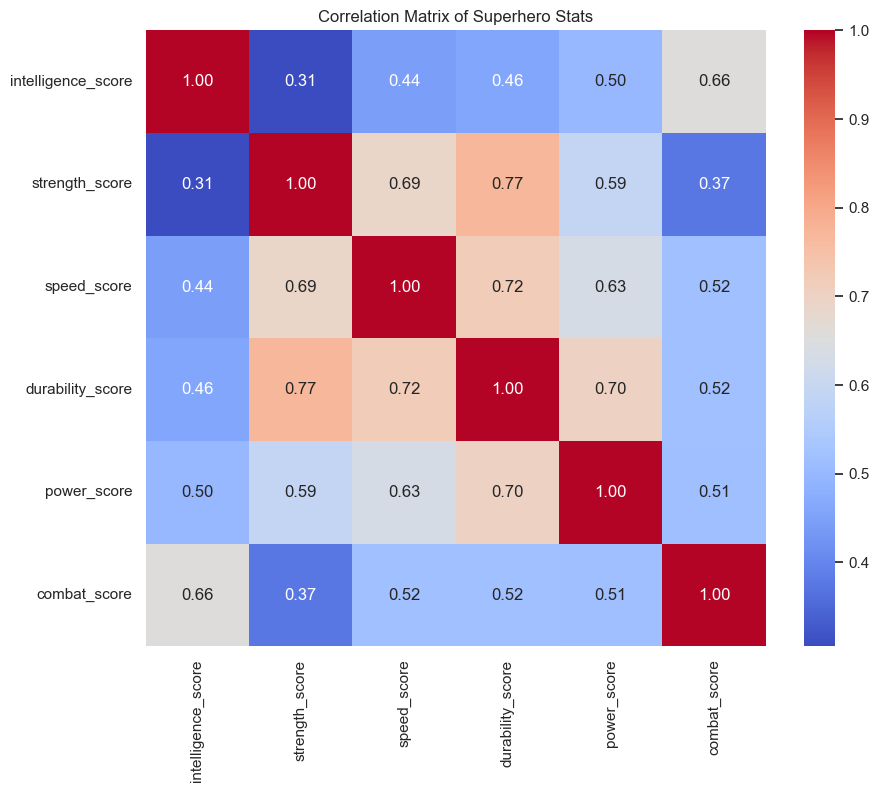

In [12]:
# Calculate correlation matrix for the stats
corr_matrix = df_clean[core_stats].corr()

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Superhero Stats')
plt.show()

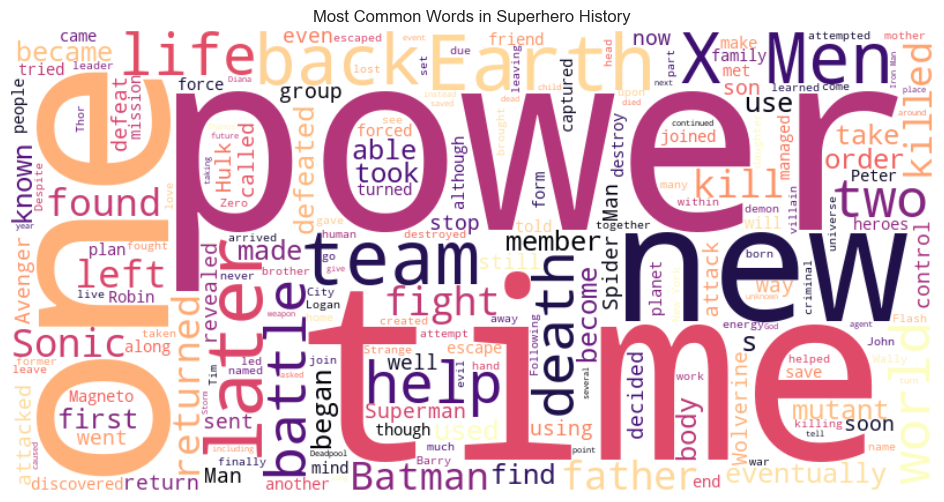

In [13]:
# Combine all history text into one big string
all_history = " ".join(text for text in df_clean.history_text)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(all_history)

# Display
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Superhero History')
plt.show()

/var/folders/lx/y473dmd16l3c0kkr0h14c2x40000gn/T/ipykernel_57752/3496231613.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='strength_score', y='name', data=top_strength, palette='rocket')


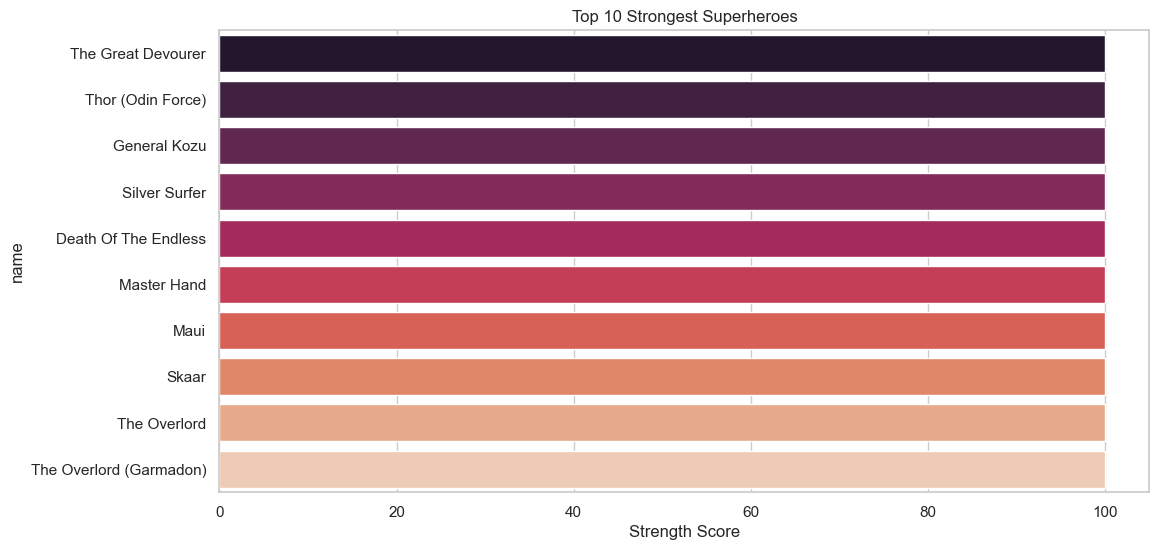

In [14]:
# Get top 10 strongest heroes
top_strength = df_clean[['name', 'strength_score', 'overall_score']].sort_values(by='strength_score', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='strength_score', y='name', data=top_strength, palette='rocket')
plt.title('Top 10 Strongest Superheroes')
plt.xlabel('Strength Score')
plt.show()